In [4]:
import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections
import os
from collections import OrderedDict
import uproot
import pandas as pd

import scipy
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
# CMS_lumi.writeExtraText = 0

wH = 1
Z_MASS = 91.2


# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# Load ntuples

In [7]:
limitTrees =OrderedDict()
dataCards = OrderedDict()

limitTrees_obs =OrderedDict()
dataCards_obs = OrderedDict()
limitTrees_hybridNew = OrderedDict()
version = '/V1p17/v1/v75/'
version = '/V1p17/v2/v100/'
version = '/V1p17/v2/v106/'



dc_version = 'v12'
nrechit = 130
dphi = 'dPhiCluster0p75'

mode = 'allProd_withggZH'

decay = '4Tau'
decay = 'dddd'
decay = 'bbbb'


methodA = False
# unblind = 'unblindABC'
unblind = 'unblind'
hybridNew = 0

bdt_name = 'cut_based_v4'
limitDir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees/'+version+'/'+bdt_name+'/'+dc_version+'/'
dataCardDir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/datacards/'+version+'/'+bdt_name+'/'+dc_version+'/'
hybridNewDir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/hybridNew/'+version+'/'+bdt_name+'/'+dc_version+'/'


if methodA:
    limitDir+='methodA/'
    dataCardDir+='methodA/'
    hybridNewDir+='methodA/'
else:
    limitDir+='methodB/'
    dataCardDir+='methodB/'
    hybridNewDir+='methodB/'
lumi = 137000


ctaus = np.array([10, 20, 30, 40, 50, 60, 100, 125,200, 300, 500, 1000, 2000, 3000, 5000, 10000, 20000, 30000, 50000, 100000,int(2e5),int(3e5),int(5e5), \
                        int(2e6),int(3e6),int(5e6),int(1e7)])



if decay == 'bbbb': mass = np.array([ 15, 40, 55])
else:mass = np.array([ 7, 15, 40, 55])

### limit branch: 2.5, 16.0, 50.0, 84.0, 97.5, obs
expected = ['0.025', '0.160','0.500','0.840','0.975']


for m in mass:
    limitTrees[m] = {}
    dataCards[m] = {}
    limitTrees_hybridNew[m] = {}
    for ct in ctaus:
        name = mode+'_HToSSTo'+decay
        dataCards[m][ct] = dataCardDir + '/'+unblind+'/'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+ dphi+'.txt'
        if unblind=='unblind':limitTrees[m][ct] = limitDir + '/'+unblind+'/obs/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+ dphi+'.AsymptoticLimits.mH120.root'
        else:limitTrees[m][ct] = limitDir + '/'+unblind+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+ dphi+'.AsymptoticLimits.mH120.root'
        if hybridNew:
            limitTrees[m][ct] = []
            for i in range(6):
                if i==5:limitTrees[m][ct].append(hybridNewDir +'/'+unblind+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+ dphi+'.HybridNew.mH120.root')
                else:limitTrees[m][ct].append(hybridNewDir +'/'+unblind+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+ dphi+'.HybridNew.mH120.quant'+expected[i]+'.root')
norms = []
limits = {}
for i,m in enumerate(limitTrees.keys()):
    limits[m] = np.ones((len(ctaus), 6))*1000000
    for j, k in enumerate(limitTrees[m].keys()):
        if not os.path.isfile(dataCards[m][k]):continue
        line = open(dataCards[m][k], "r").readline()
        signal_norm = float(line.split(" ")[3])
        if signal_norm == 0:continue
        if hybridNew:
            for n in range(6):
#                 if n == 0 or n == 4 or n == 1:continue
                T = uproot.open(limitTrees[m][k][n])['limit']
                if len(np.array(T.array('limit'))>0):limits[m][j][n] = np.array(T.array('limit'))/signal_norm
                
        else:
            if len(uproot.open(limitTrees[m][k]).keys()) == 2:
                T = uproot.open(limitTrees[m][k])['limit']
                limits[m][j] = np.array(T.array('limit'))/signal_norm
    limits[m] = np.array(limits[m])

print(ctaus)
print(norms)



[      10       20       30       40       50       60      100      125
      200      300      500     1000     2000     3000     5000    10000
    20000    30000    50000   100000   200000   300000   500000  2000000
  3000000  5000000 10000000]
[]


# Observed Limit

[1.00e-02 2.00e-02 3.00e-02 4.00e-02 5.00e-02 6.00e-02 1.00e-01 1.25e-01
 2.00e-01 3.00e-01 5.00e-01 1.00e+00 2.00e+00 3.00e+00 5.00e+00 1.00e+01
 2.00e+01 3.00e+01 5.00e+01 1.00e+02 2.00e+02 3.00e+02 5.00e+02 2.00e+03
 3.00e+03 5.00e+03 1.00e+04]
137 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


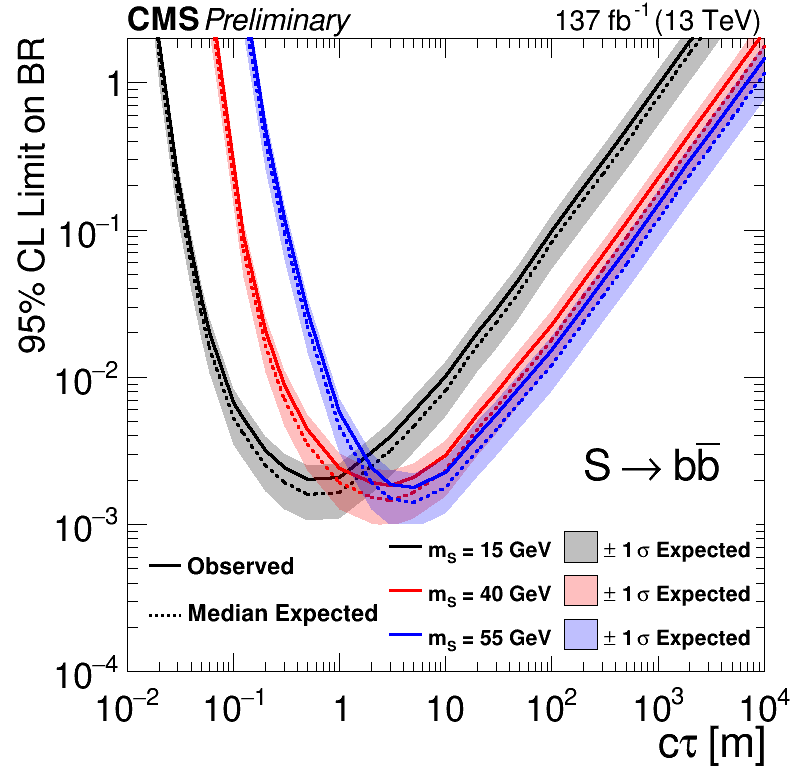

In [12]:
import os
import importlib
importlib.reload(sys.modules['CMS_lumi'])





opac_1sig = 0.25
opac_2sig = 0.1
for band in [0,1,2]:# 0 is no band, 1 is with 1sig only, 2 is with both 1sig and 2sig band
    if not band == 1:continue

    if band ==2: 
        leg = rt.TLegend(0.3,0.75,0.9,0.92)
        leg2 = rt.TLegend(0.1,0.75,0.3,0.90)
    elif band ==1:   
        leg = rt.TLegend(0.48,0.15,0.95,0.32)
        leg2 = rt.TLegend(0.18,0.17,0.40,0.30)
    else:
        leg = rt.TLegend(0.6,0.7,0.9,0.92)
        leg2 = rt.TLegend(0.2,0.7,0.45,0.92)
    
  
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    
    leg2.SetTextSize(0.032)
    leg2.SetBorderSize(0)
    leg2.SetEntrySeparation(0.01)
    c = rt.TCanvas('c','c', 800, 800)
    c.SetRightMargin(0.04)


    rt.gStyle.SetOptFit(1011)
    ctaus_m = ctaus/1000
    print(ctaus_m)
    h = {}
    h_exp1sig = {}
    h_exp2sig = {}
    h_obs = {}
    h_others = {}
   
    for i, m in enumerate(mass):
        cond = limits[m][:,2] < 100000000

        h[m] = create_TGraph(ctaus_m[cond], limits[m][:,2][cond],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
        h_obs[m] = create_TGraph(ctaus_m[cond], limits[m][:,5][cond],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
    
        h_exp1sig[m] = create_TGraph(np.hstack((ctaus_m[cond], np.flip(ctaus_m[cond]))), np.hstack((limits[m][:,1][cond], np.flip(limits[m][:,3][cond]))))
        h_exp2sig[m] = create_TGraph(np.hstack((ctaus_m[cond], np.flip(ctaus_m[cond]))), np.hstack((limits[m][:,0][cond], np.flip(limits[m][:,4][cond]))))
        
        leg.AddEntry(h_obs[m], "m_{S} = "+str(m)+" GeV", "L")
        if m == 15:
            leg2.AddEntry(h_obs[m], "Observed", "LP")
            leg2.AddEntry(h[m], "Median Expected", "L")
            

        if band>0: leg.AddEntry(h_exp1sig[m], "#pm 1 #sigma Expected", 'F')
        if band==2: leg.AddEntry(h_exp2sig[m], "#pm 2 #sigma Expected", 'F')
        
        if len(mass) == 3: 
            h_exp1sig[m].SetFillColorAlpha(std_color_list[i],opac_1sig)
            h_exp2sig[m].SetFillColorAlpha(std_color_list[i], opac_2sig)
            h[m].SetLineColor(std_color_list[i])
            h_obs[m].SetLineColor(std_color_list[i])
            h_obs[m].SetMarkerColor(std_color_list[i])


        else: 
            if i == 0:
                h_exp1sig[m].SetFillColorAlpha(std_color_list[3], opac_1sig)
                h_exp2sig[m].SetFillColorAlpha(std_color_list[3], opac_2sig)
                h[m].SetLineColor(std_color_list[3])
                h_obs[m].SetLineColor(std_color_list[3])
                h_obs[m].SetMarkerColor(std_color_list[3])
            else: 
                h_exp1sig[m].SetFillColorAlpha(std_color_list[i-1],opac_1sig)
                h_exp2sig[m].SetFillColorAlpha(std_color_list[i-1], opac_2sig)
                h[m].SetLineColor(std_color_list[i-1])
                h_obs[m].SetLineColor(std_color_list[i-1])
                h_obs[m].SetMarkerColor(std_color_list[i-1])
        h_obs[m].SetLineWidth(3)

        h[m].SetLineStyle(2)
        h[m].SetLineWidth(3)
        h[m].GetXaxis().SetLimits(0.01,10000.0)
        h[m].GetYaxis().SetRangeUser(5e-4,50)
        h[m].GetYaxis().SetRangeUser(1e-4,2)

        h[m].GetXaxis().SetTitleOffset(1)
        h[m].GetYaxis().SetTitleSize(0.05)
        h[m].GetYaxis().SetTitleOffset(1.5)
        
        

    for i,m in enumerate(h.keys()):
        h[m].Draw('LA' if i == 0 else 'Lsame')
        h_obs[m].Draw('LPsame')
        if band>0: h_exp1sig[m].Draw('Fsame')
        if band==2: h_exp2sig[m].Draw('Fsame')

 

    tdrstyle.setTDRStyle()
    CMS_lumi.cmsText     = "CMS"
    iPos = 0
    CMS_lumi.writeExtraText = 1
    CMS_lumi.extraText   = "Preliminary"

    if( iPos==0 ): CMS_lumi.relPosX = 0.12
    # CMS_lumi.CMS_lumi(c, 4, 0)
    CMS_lumi.CMS_lumi(c, 4, iPos)


    if band>0:leg.SetNColumns(2)
    if band == 2:leg.SetNColumns(3)

    leg.Draw()
    leg2.Draw()
    c.SetLogy()
    c.SetLogx()
    c.SetTicky(1)
    c.SetTickx(1)
    
    
    latex = rt.TLatex()
    latex.SetTextSize(0.06)
    latex.SetTextFont(42)
        
    if decay == 'dddd': latex.DrawLatex(200,0.002,  "S #rightarrow d#bar{d}")
    elif decay == 'bbbb': latex.DrawLatex(200,0.002, "S #rightarrow b#bar{b}")
    elif decay == '4Tau': latex.DrawLatex(200,0.002, "S #rightarrow #tau^{+}#tau^{-}")



    output_dir = os.environ.get("HOME")+'/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/limits/'+version+bdt_name+'/'+dc_version+'/'+unblind+'/'
    if not os.path.isdir(output_dir):os.makedirs(output_dir)
    name = output_dir+mode+'_HToSSTo'+decay+'_'+dphi+'_nRechit'+str(nrechit)
    if hybridNew:name += '_hybridNew'
    if band==2: name += '_with2sig'
    elif band>0: name += '_with1sig'
    if CMS_lumi.writeExtraText: name += "_pas"


#     c.SaveAs(name+'.png')
#     c.SaveAs(name+'.C')
#     c.SaveAs(name+'.pdf')

    tdrstyle.setTDRStyle()
    c.Draw()
    # print(time.time()-start_t)

# load limit from other analyses

In [ ]:
file_dir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/data/limits_others/'
ms1_40 = file_dir + 'atlas_mh125_mx40_ms1.csv'
ms2_40 = file_dir + 'atlas_mh125_mx40_ms2.csv'
id55 = file_dir + 'atlas_mh125_mx55_id.csv'
comb40 = file_dir + 'atlas_mh125_mx40_id_cr_ms2.csv'

exo_19_021_bb55 = file_dir + 'exo-19-021_bb_55.csv'
exo_19_021_bb40 = file_dir + 'exo-19-021_bb_40.csv'
exo_19_021_dd55 = file_dir + 'exo-19-021_dd_55.csv'
exo_19_021_dd40 = file_dir + 'exo-19-021_dd_40.csv'
exo_19_021_dd15 = file_dir + 'exo-19-021_dd_15.csv'

# took from paper draft v5
exo_20_003_bb55 = file_dir + 'exo-20-003_bb_55.csv'
exo_20_003_bb40 = file_dir + 'exo-20-003_bb_40.csv'
exo_20_003_bb15 = file_dir + 'exo-20-003_bb_15.csv'
exo_20_003_dd55 = file_dir + 'exo-20-003_dd_55.csv'
exo_20_003_dd40 = file_dir + 'exo-20-003_dd_40.csv'
exo_20_003_dd15 = file_dir + 'exo-20-003_dd_15.csv'

ms_40 = file_dir + 'atlas_mh125_mx40_ms.csv'
ms_15 = file_dir + 'atlas_mh125_mx15_ms.csv'
ms_8 = file_dir + 'atlas_mh125_mx8_ms.csv'

other_limits = {}

other_limits['atlas_ms_40'] = np.genfromtxt(ms_40, delimiter=',')
other_limits['atlas_ms_15'] = np.genfromtxt(ms_15, delimiter=',')
other_limits['atlas_ms_8'] = np.genfromtxt(ms_8, delimiter=',')

other_limits['exo_19_021_bb55'] = np.genfromtxt(exo_19_021_bb55, delimiter=',')
other_limits['exo_19_021_bb40'] = np.genfromtxt(exo_19_021_bb40, delimiter=',')
other_limits['exo_19_021_dd55'] = np.genfromtxt(exo_19_021_dd55, delimiter=',')
other_limits['exo_19_021_dd40'] = np.genfromtxt(exo_19_021_dd40, delimiter=',')
other_limits['exo_19_021_dd15'] = np.genfromtxt(exo_19_021_dd15, delimiter=',')

# other_limits['exo_20_003_bb55'] = np.genfromtxt(exo_20_003_bb55, delimiter=',')
# other_limits['exo_20_003_bb40'] = np.genfromtxt(exo_20_003_bb40, delimiter=',')
other_limits['exo_20_003_bb15'] = np.genfromtxt(exo_20_003_bb15, delimiter=',')
# other_limits['exo_20_003_dd55'] = np.genfromtxt(exo_20_003_dd55, delimiter=',')
# other_limits['exo_20_003_dd40'] = np.genfromtxt(exo_20_003_dd40, delimiter=',')
# other_limits['exo_20_003_dd15'] = np.genfromtxt(exo_20_003_dd15, delimiter=',')






# Compare with ATLAS (all masses)

In [ ]:
import os
opac_1sig = 0.25
opac_2sig = 0.1
withATLAS = 1

   


if decay == 'bbbb':
    leg = rt.TLegend(0.55,0.15,0.88,0.32)
    leg.SetTextSize(0.028)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.005)
else:
    leg = rt.TLegend(0.49,0.15,0.88,0.32)
    
    leg.SetTextSize(0.028)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.005)

leg2 = rt.TLegend(0.2,0.15,0.45,0.32)
leg2.SetTextSize(0.028)
leg2.SetBorderSize(0)
leg2.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)
c.SetRightMargin(0.04)


rt.gStyle.SetOptFit(1011)
ctaus_m = ctaus/1000
print(ctaus_m)
h = {}
h_exp1sig = {}
h_exp2sig = {}
h_obs = {}
h_others = {}
upper = 500

if withATLAS:
    
    if not 'b' in decay: h_others[7] = create_TGraph(other_limits['atlas_ms_8'][:,0][other_limits['atlas_ms_8'][:,1]<upper],other_limits['atlas_ms_8'][:,1][other_limits['atlas_ms_8'][:,1]<upper],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
    h_others[15] = create_TGraph(other_limits['atlas_ms_15'][:,0][other_limits['atlas_ms_15'][:,1]<upper],other_limits['atlas_ms_15'][:,1][other_limits['atlas_ms_15'][:,1]<upper],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
    h_others[40] = create_TGraph(other_limits['atlas_ms_40'][:,0][other_limits['atlas_ms_40'][:,1]<upper],other_limits['atlas_ms_40'][:,1][other_limits['atlas_ms_40'][:,1]<upper],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
#         for k, v in h_others.items():
#             leg.AddEntry(h_others[k], "ATLAS MS (36 fb^{-1})", 'L')


for i, m in enumerate(mass):
    cond = limits[m][:,5] < upper
    h_obs[m] = create_TGraph(ctaus_m[cond], limits[m][:,5][cond],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
#     print(m)
#     print(ctaus_m[cond])
    print(limits[m][:,5][cond])
    if m == 7:leg.AddEntry(h_obs[m], "m_{x} = "+str(m)+" GeV (8 GeV for ATLAS)", "L")
    else: leg.AddEntry(h_obs[m], "m_{x} = "+str(m)+" GeV", "L")
    if m == 15:
        leg2.AddEntry(h_obs[m], "Observed Limit", "LP")
        leg2.AddEntry(h_others[m], "ATLAS Limit", "L")


    if len(mass) == 3: 
        if not m == 55:h_others[m].SetLineColor(std_color_list[i])
        h_obs[m].SetLineColor(std_color_list[i])
#         h_obs[m].SetMarkerColor(std_color_list[i])


    else: 
        if i == 0:
            h_others[m].SetLineColor(std_color_list[3])
            h_obs[m].SetLineColor(std_color_list[3])
            h_obs[m].SetMarkerColor(std_color_list[3])
        else: 
            if not m == 55:h_others[m].SetLineColor(std_color_list[i-1])
            h_obs[m].SetLineColor(std_color_list[i-1])
#             h_obs[m].SetMarkerColor(std_color_list[i-1])
    h_obs[m].SetLineWidth(3)
#     h_obs[m].SetMarkerStyle(20)
#     h_obs[m].SetMarkerSize(1)
    if not m == 55:
        h_others[m].SetLineStyle(2)
        h_others[m].SetLineWidth(3)
        h_others[m].GetXaxis().SetLimits(0.01,10000.0)
#         h_others[m].GetYaxis().SetRangeUser(5e-4,100)
        h_others[m].GetYaxis().SetRangeUser(1e-4,2)


        h_others[m].GetXaxis().SetTitleOffset(1)
        h_others[m].GetYaxis().SetTitleSize(0.05)
        h_others[m].GetYaxis().SetTitleOffset(1.5)



for i,m in enumerate(h_obs.keys()):
    if not m == 55:
        h_others[m].Draw('LA' if i == 0 else 'Lsame')
    h_obs[m].Draw('LPsame')



tdrstyle.setTDRStyle()
CMS_lumi.cmsText     = "CMS"
iPos = 0
CMS_lumi.writeExtraText = True
CMS_lumi.extraText   = "Preliminary"

if( iPos==0 ): CMS_lumi.relPosX = 0.12
# CMS_lumi.CMS_lumi(c, 4, 0)
CMS_lumi.CMS_lumi(c, 4, iPos)

leg.Draw()
leg2.Draw()
c.SetLogy()
c.SetLogx()
c.SetTicky(1)
c.SetTickx(1)
output_dir = os.environ.get("HOME")+'/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/limits/'+version+bdt_name+'/'+dc_version+'/'+unblind+'/'
if not os.path.isdir(output_dir):os.makedirs(output_dir)
name = output_dir+mode+'_HToSSTo'+decay+'_'+dphi+'_nRechit'+str(nrechit)+'_observed_withATLAS'
if hybridNew:name += '_hybridNew'


# c.SaveAs(name+'.png')
# c.SaveAs(name+'.C')
# c.SaveAs(name+'.pdf')

tdrstyle.setTDRStyle()
c.Draw()



# Compare with others (by mass point)

In [ ]:
import os
opac_1sig = 0.25
opac_2sig = 0.1
withdisplacedJet = 1
observed = 1
withATLAS = 1
scaleATLAS = 0

for m in [7,15,40,55]:
    if m == 7 and decay == 'bbbb':continue
    if not m == 40:continue
    leg = rt.TLegend(0.59,0.74,0.88,0.9)
    if m == 7:leg = rt.TLegend(0.4,0.75,0.9,0.85)
    leg.SetTextSize(0.025)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    c = rt.TCanvas('c','c', 800, 800)
    c.SetRightMargin(0.04)


    rt.gStyle.SetOptFit(1011)
    ctaus_m = ctaus/1000
    h_others = {}
    h = {}
    h_exp1sig = {}
    h_exp2sig = {}
    h_mark = {}

    for k, v in other_limits.items():
        if not str(m) in k and not (m==7 and '8' in k): continue
        if not decay[:2] in k and not 'atlas' in k:continue
        if not withATLAS and 'atlas' in k:continue
        if scaleATLAS == 1 and 'atlas' in k:    
            h_others[k] = create_TGraph(v[:,0],v[:,1]/(137/36.1)**0.5,  axis_title=['c#tau [m]', '95% CL Limit on BR'])
        else:
            h_others[k] = create_TGraph(v[:,0],v[:,1],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
            if 'atlas' in k:print('atlas',v[:,0],v[:,1])


    for i,k in enumerate(h_others.keys()):

        if 'exo_19_021' in k: leg.AddEntry(h_others[k], "EXO-19-021", 'L')
        elif withATLAS and 'atlas' in k and scaleATLAS and m == 7:leg.AddEntry(h_others[k], "ATLAS MS (scaled by 1.9),  m_{x} = 8 GeV", 'L')
        elif withATLAS and 'atlas' in k and not scaleATLAS and m == 7:leg.AddEntry(h_others[k], "ATLAS MS (36 fb^{-1}),  m_{x} = 8 GeV", 'L')
        elif withATLAS and 'atlas' in k and scaleATLAS:leg.AddEntry(h_others[k], "ATLAS MS (scaled by 1.9)", 'L')
        elif withATLAS and 'atlas' in k and not scaleATLAS:leg.AddEntry(h_others[k], "ATLAS MS (36 fb^{-1})", 'L')
        elif '20_003' in k: leg.AddEntry(h_others[k], "EXO-20-003", 'L')

        if 'exo_19_021' in k: h_others[k].SetLineColor(std_color_list[1])
        elif withATLAS and 'atlas' in k : h_others[k].SetLineColor(std_color_list[2])
        elif '20_003' in k:  h_others[k].SetLineColor(std_color_list[3])
    
    
    cond = limits[m][:,2] < 1
    if scaleATLAS:  
        if observed: h[m] = create_TGraph(ctaus_m[cond], limits[m][:,5][cond]/2**0.5,  axis_title=['c#tau [m]', '95% CL Limit on BR'])
        else:h[m] = create_TGraph(ctaus_m[cond], limits[m][:,2][cond]/2**0.5,  axis_title=['c#tau [m]', '95% CL Limit on BR'])
        if m == 7:leg.AddEntry(h[m], "EXO-20-015,  m_{x} = 7 GeV (scaled by #sqrt{2})", "L")
        else:leg.AddEntry(h[m], "EXO-20-015 (scaled by #sqrt{2})", "L")
    else: 
        if observed: h[m] = create_TGraph(ctaus_m[cond], limits[m][:,5][cond],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
        else:h[m] = create_TGraph(ctaus_m[cond], limits[m][:,5][cond],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
        if m == 7:leg.AddEntry(h[m], "EXO-20-015,  m_{x} = 7 GeV", "L")
        else:leg.AddEntry(h[m], "EXO-20-015", "L")
            
        print(ctaus_m[cond], limits[m][:,5][cond])


    h[m].SetLineColor(std_color_list[0])
    h[m].SetLineWidth(3)
    if m == 7:h[m].GetXaxis().SetLimits(0.01,1000.0)
    else:h[m].GetXaxis().SetLimits(0.001,1000.0)
    h[m].GetYaxis().SetRangeUser(1e-4,100)
    h[m].GetXaxis().SetTitleOffset(1)
    h[m].GetYaxis().SetTitleSize(0.05)
    h[m].GetYaxis().SetTitleOffset(1.5)
    h[m].Draw('LA')


    for i, k in enumerate(h_others.keys()): 
        h_others[k].SetLineWidth(2)
        h_others[k].Draw('Lsame')



    tdrstyle.setTDRStyle()
    CMS_lumi.cmsText     = "CMS"
    iPos = 0
    CMS_lumi.writeExtraText = True
    CMS_lumi.extraText   = "Preliminary"

    if( iPos==0 ): CMS_lumi.relPosX = 0.12
    # CMS_lumi.CMS_lumi(c, 4, 0)
    CMS_lumi.CMS_lumi(c, 4, iPos)


    leg.Draw()
    c.SetLogy()
    c.SetLogx()
    c.SetTicky(1)
    c.SetTickx(1)
    output_dir = os.environ.get("HOME")+'/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/limits/'+version+bdt_name+'/'+dc_version+'/'+unblind+'/'
    if not os.path.isdir(output_dir):os.makedirs(output_dir)
    name = output_dir+mode+'_HToSSTo'+decay+'_'+dphi+'_nRechit'+str(nrechit)+'_mass'+str(m)+'_compare'
    if observed: name += '_observed'
    else: name += '_expected'
    if withATLAS: name+='_withATLAS'
    if withATLAS and scaleATLAS: name+='_scaledATLAS'
    print(name)

#     c.SaveAs(name+'.png')
#     c.SaveAs(name+'.C')
#     c.SaveAs(name+'.pdf')

    tdrstyle.setTDRStyle()
    c.Draw()
    # print(time.time()-start_t)